In [1]:
import pandas as pd
import re

In [2]:
tokped = pd.read_csv("dataset/tokopedia_reviews.csv", encoding="utf-8")
tokped.head()

,Date,Rating,Review
0,3 Juni 2025,3,3 juni 2025 ada bug dimana saat menghapus daft...
1,2 Juni 2025,1,"Semenjak Tokopedia di bawah naungan Tiktok, ma..."
2,3 Juni 2025,5,Buyers jangan ragu adanya pembatalan sistem to...
3,3 Juni 2025,4,"Keren, ini app skrg bisa jalan lg di hp gw yg ..."
4,1 Juni 2025,5,aplikasi yang menyediakan barang² bagus saya s...


In [30]:
tokped.describe()

,Rating
count,3680.000000
mean,2.114402
std,1.537502
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,5.000000


In [31]:
tokped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3680 entries, 0 to 3679
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    3680 non-null   object
 1   Rating  3680 non-null   int64 
 2   Review  3680 non-null   object
dtypes: int64(1), object(2)
memory usage: 86.4+ KB


In [32]:
tokped.isna().sum()

Date      0
Rating    0
Review    0
dtype: int64

In [34]:
tokped.duplicated().sum()

0

In [17]:
shopee = pd.read_csv("shopee_reviews.csv", encoding="utf-8")
shopee.head()

,Date,Rating,Review
0,3 Juni 2025,2,Mohon dipertimbangkan agar tampilan awal aplik...
1,2 Juni 2025,3,"sebenarnya suka sama aplikasinya, cuman keseri..."
2,3 Juni 2025,1,"Awal nya enak pengiriman cepat pakai J&T, seka..."
3,2 Juni 2025,4,Aplikasinya sih simple cuma yg sedikit saya ti...
4,2 Juni 2025,1,Kenapa sekarang2 setiap buka aplikasi Shopee s...


In [19]:
shopee.describe()

,Rating
count,3800.000000
mean,3.028684
std,1.746796
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,5.000000


In [20]:
shopee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    3800 non-null   object
 1   Rating  3800 non-null   int64 
 2   Review  3800 non-null   object
dtypes: int64(1), object(2)
memory usage: 89.2+ KB


In [21]:
shopee.isna().sum()

Date      0
Rating    0
Review    0
dtype: int64

In [35]:
shopee.duplicated().sum()

0

In [ ]:
tokped['Platform'] = 'tokopedia' 
shopee['Platform'] = 'shopee'

In [44]:
olshop = pd.concat([tokped, shopee], ignore_index=True)

olshop.head()

,Date,Rating,Review,Platform
0,3 Juni 2025,3,3 juni 2025 ada bug dimana saat menghapus daft...,tokopedia
1,2 Juni 2025,1,"Semenjak Tokopedia di bawah naungan Tiktok, ma...",tokopedia
2,3 Juni 2025,5,Buyers jangan ragu adanya pembatalan sistem to...,tokopedia
3,3 Juni 2025,4,"Keren, ini app skrg bisa jalan lg di hp gw yg ...",tokopedia
4,1 Juni 2025,5,aplikasi yang menyediakan barang² bagus saya s...,tokopedia


In [47]:
print(olshop['Rating'].value_counts())

Rating
1    3474
5    1987
2     755
3     685
4     579
Name: count, dtype: int64


In [48]:
print(olshop['Review'].str.len().describe())

count    7480.000000
mean      239.116711
std       118.093633
min        19.000000
25%       151.000000
50%       214.000000
75%       307.000000
max       500.000000
Name: Review, dtype: float64


In [49]:
def label_sentiment(rating):
    if rating >= 4:
        return 'positif'
    elif rating == 3:
        return 'netral'
    else:
        return 'negatif'

In [ ]:
olshop['Sentimen_Star'] = olshop['Rating'].apply(label_sentiment)

In [3]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import re

factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
stemmer = StemmerFactory().create_stemmer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = text.split()
    words = [word for word in words if word not in stopwords]
    return ' '.join([stemmer.stem(word) for word in words])

In [ ]:
olshop['clean_review'] = olshop['Review'].apply(clean_text)

In [62]:
olshop['clean_review']

0       juni bug hapus daftar barang keranjang langsun...
1       semenjak tokopedia bawah naung tiktok makin am...
2       buyers jangan ragu ada batal sistem tokopedia ...
3       keren app skrg jalan lg hp gw yg android kadan...
4       aplikasi sedia barang bagus selaku guna tuju s...
                              ...                        
7475    alhamdulillah shopee tetep jaga nyaman aman cu...
7476    aplikasi shoppe sekarang banyak bug nya masa b...
7477    aplikasi nya makin kesini malah makin sering e...
7478    si pas masuk shoope langsung shoope video mana...
7479    dulu shoppe cukup bagus cepatskrg makin parah ...
Name: clean_review, Length: 7480, dtype: object

In [ ]:
pd.DataFrame(olshop.to_csv("dataset/olshop_reviews.csv", index=False, encoding="utf-8"))

In [2]:
olshop = pd.read_csv("dataset/olshop_reviews.csv", encoding="utf-8")

In [3]:
olshop.head()

,Date,Rating,Review,Platform,Sentimen,clean_review
0,3 Juni 2025,3,3 juni 2025 ada bug dimana saat menghapus daft...,tokopedia,netral,juni bug hapus daftar barang keranjang langsun...
1,2 Juni 2025,1,"Semenjak Tokopedia di bawah naungan Tiktok, ma...",tokopedia,negatif,semenjak tokopedia bawah naung tiktok makin am...
2,3 Juni 2025,5,Buyers jangan ragu adanya pembatalan sistem to...,tokopedia,positif,buyers jangan ragu ada batal sistem tokopedia ...
3,3 Juni 2025,4,"Keren, ini app skrg bisa jalan lg di hp gw yg ...",tokopedia,positif,keren app skrg jalan lg hp gw yg android kadan...
4,1 Juni 2025,5,aplikasi yang menyediakan barang² bagus saya s...,tokopedia,positif,aplikasi sedia barang bagus selaku guna tuju s...


In [4]:
def load_lexicon_weighted(file_path):
    df_lex = pd.read_csv(file_path, sep="\t")
    return dict(zip(df_lex['word'].str.lower(), df_lex['weight']))

In [5]:
lex_positif = load_lexicon_weighted("InSet/positive.tsv")
lex_negatif = load_lexicon_weighted("InSet/negative.tsv")

In [6]:
lexicon = {**lex_positif, **lex_negatif}

In [7]:
def get_sentiment_score(review):
    try:
        score = sum(lexicon.get(word, 0) for word in review.split())
    except Exception as e:
        print(f"Error processing review: {review}\n{e}")
      
    if score > 0:
        return 'positif'
    elif score < 0:
        return 'negatif'
    else:
        return 'netral'

In [8]:
olshop.isnull().sum()

Date            0
Rating          0
Review          0
Platform        0
Sentimen        0
clean_review    6
dtype: int64

In [9]:
olshop.dropna(subset=['clean_review'], inplace=True)

In [10]:
olshop.isnull().sum()

Date            0
Rating          0
Review          0
Platform        0
Sentimen        0
clean_review    0
dtype: int64

In [11]:
olshop["sentimen_lexicon"] = olshop["clean_review"].apply(get_sentiment_score)

In [15]:
olshop.groupby("Sentimen")["clean_review"].count()

Sentimen
negatif    4228
netral      685
positif    2561
Name: clean_review, dtype: int64

In [16]:
olshop["sentimen_lexicon"].value_counts()

sentimen_lexicon
negatif    6635
positif     708
netral      131
Name: count, dtype: int64

In [17]:
print(olshop['sentimen_lexicon'].value_counts(normalize=True))

sentimen_lexicon
negatif    0.887744
positif    0.094728
netral     0.017527
Name: proportion, dtype: float64


In [12]:
pd.DataFrame(olshop.to_csv("dataset/olshop_reviews_lexicon.csv", index=False, encoding="utf-8"))

""


# Feature Extraction

### TD-idf

In [208]:
# convert textual data to numerical data
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    # max_features=5000,        # gunakan top 5000 kata
    ngram_range=(1,2),        # unigram + bigram
    min_df=5,                 # kata harus muncul di minimal 5 dokumen
    max_df=0.9                # buang kata yang muncul di >90% dokum
)

In [209]:
X = vectorizer.fit_transform(olshop['clean_review'])

In [278]:
#y = olshop['Sentimen'] # Using rating-based sentiment labels
y = olshop['sentimen_lexicon'] # Using lexicon-based sentiment labels

### Using lexicon as a feature

In [211]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
olshop['lexicon_sentiment_encoded'] = le.fit_transform(olshop['sentimen_lexicon'])

In [ ]:
from scipy.sparse import hstack

# Fitur tambahan dari lexicon (harus reshape karena 1D)
X_lexicon = olshop['lexicon_sentiment_encoded'].values.reshape(-1, 1)

X_final = hstack([X, X_lexicon])

### Using Rating as a feature

In [279]:
le = LabelEncoder()
olshop['rating_sentiment_encoded'] = le.fit_transform(olshop['Sentimen'])

In [280]:
# Fitur tambahan dari rating (harus reshape karena 1D)
X_rating = olshop['rating_sentiment_encoded'].values.reshape(-1, 1)

X_final = hstack([X, X_rating])

# Modeling

## Naive Bayes & Logistic Regression

In [281]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

### Split Data

In [282]:
X_train, X_test, y_train, y_test = train_test_split(X_final,y,test_size=0.2, random_state=42)

### Model 1: Naive Bayes

In [283]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)

In [284]:
print("=== Naive Bayes Report ===")
print(classification_report(y_test, nb_preds))

=== Naive Bayes Report ===
              precision    recall  f1-score   support

     negatif       0.87      1.00      0.93      1307
      netral       0.00      0.00      0.00        27
     positif       0.00      0.00      0.00       161

    accuracy                           0.87      1495
   macro avg       0.29      0.33      0.31      1495
weighted avg       0.76      0.87      0.82      1495



c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [285]:
for a in [0.0, 0.1, 0.5 ,0.9]:
    model = MultinomialNB(alpha=a)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\n=== alpha={a} ===")
    print(classification_report(y_test, preds))


=== alpha=0.0 ===
              precision    recall  f1-score   support

     negatif       0.88      1.00      0.93      1307
      netral       0.00      0.00      0.00        27
     positif       1.00      0.02      0.05       161

    accuracy                           0.88      1495
   macro avg       0.63      0.34      0.33      1495
weighted avg       0.87      0.88      0.82      1495


=== alpha=0.1 ===
              precision    recall  f1-score   support

     negatif       0.88      1.00      0.94      1307
      netral       0.00      0.00      0.00        27
     positif       1.00      0.07      0.14       161

    accuracy                           0.88      1495
   macro avg       0.63      0.36      0.36      1495
weighted avg       0.88      0.88      0.83      1495


=== alpha=0.5 ===
              precision    recall  f1-score   support

     negatif       0.87      1.00      0.93      1307
      netral       0.00      0.00      0.00        27
     positif      

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classi

### Model 2 : Naive Bayes + RandomOverSampler

In [286]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [287]:
nb_model_resampled = MultinomialNB(alpha=0.4)  
nb_model_resampled.fit(X_train_resampled, y_train_resampled)
nb_preds_resampled = nb_model_resampled.predict(X_test)

In [288]:
print("=== Naive Bayes Report ===")
print(classification_report(y_test, nb_preds_resampled))

=== Naive Bayes Report ===
              precision    recall  f1-score   support

     negatif       0.94      0.90      0.92      1307
      netral       0.00      0.00      0.00        27
     positif       0.42      0.55      0.48       161

    accuracy                           0.85      1495
   macro avg       0.45      0.48      0.47      1495
weighted avg       0.86      0.85      0.85      1495



### Model 3: Logistic Regression

In [289]:
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

In [290]:
print("=== Logistic Regression Report ===")
print(classification_report(y_test, lr_preds))

=== Logistic Regression Report ===
              precision    recall  f1-score   support

     negatif       0.97      0.93      0.95      1307
      netral       0.00      0.00      0.00        27
     positif       0.57      0.78      0.66       161

    accuracy                           0.89      1495
   macro avg       0.51      0.57      0.54      1495
weighted avg       0.91      0.89      0.90      1495



In [291]:
lr_2_model = LogisticRegression(
    penalty='l2', 
    C=1.0, 
    solver='liblinear', 
    class_weight='balanced', 
    max_iter=400)
lr_2_model.fit(X_train, y_train)
lr2_preds = lr_2_model.predict(X_test)

In [292]:
print("=== Logistic Regression 2 Report ===")
print(classification_report(y_test, lr2_preds))

=== Logistic Regression 2 Report ===
              precision    recall  f1-score   support

     negatif       0.92      0.99      0.95      1307
      netral       0.00      0.00      0.00        27
     positif       0.84      0.44      0.58       161

    accuracy                           0.91      1495
   macro avg       0.59      0.48      0.51      1495
weighted avg       0.89      0.91      0.90      1495



### Model 4: Logistic Regression + SMOTE

In [293]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [294]:
lr_smote_model = LogisticRegression(
    penalty='l2', 
    C=1.0, 
    solver='liblinear', 
    class_weight='balanced', 
    max_iter=400)
lr_smote_model.fit(X_resampled, y_resampled)
lr_smote_preds = lr_smote_model.predict(X_test)

In [295]:
print("=== Logistic Regression 2 Report ===")
print(classification_report(y_test, lr_smote_preds))

=== Logistic Regression 2 Report ===
              precision    recall  f1-score   support

     negatif       0.96      0.94      0.95      1307
      netral       0.05      0.04      0.04        27
     positif       0.60      0.73      0.66       161

    accuracy                           0.90      1495
   macro avg       0.54      0.57      0.55      1495
weighted avg       0.90      0.90      0.90      1495



### Test Input User

In [299]:
def predict_sentiment_lexicon(text):
    text_cleaned = clean_text(text) 
    text_vectorized = vectorizer.transform([text_cleaned]) 

    lex_label = get_sentiment_score(text_cleaned)  
    lex_encoded = le.transform([lex_label])  
    
    # Convert lex_encoded ke sparse matrix agar bisa di-hstack
    from scipy.sparse import csr_matrix, hstack
    lex_feature = csr_matrix(lex_encoded).reshape(1, -1) 
    
    # Gabungkan fitur TF-IDF dan lexicon
    X_input = hstack([text_vectorized, lex_feature])
    
    # Prediksi
    sentiment = lr_smote_model.predict(X_input)[0]
    return sentiment

def predict_sentiment(text):
    text_cleaned = clean_text(text)  
    text_vectorized = vectorizer.transform([text_cleaned]) 
    sentiment = lr_smote_model.predict(text_vectorized)[0]  
    return sentiment

text_input = input("Masukkan teks ulasan: ")

if text_input.strip():
    sentiment = predict_sentiment_lexicon(text_input)
    print(f"\nTeks ulasan: {text_input}")
    print(f"Sentimen ulasan: {sentiment}")
else:
    print("Input kosong. Silakan masukkan teks ulasan yang valid.")


Teks ulasan: jelek
Sentimen ulasan: negatif


In [ ]:
summary = olshop.groupby(['Platform', 'sentimen_lexicon']).size().reset_index(name='count')

total_per_platform = olshop.groupby('Platform').size().reset_index(name='total')

summary = summary.merge(total_per_platform, on='Platform')
summary['percentage'] = (summary['count'] / summary['total'] * 100).round(2)

summary = summary[['Platform', 'sentimen_lexicon', 'count', 'percentage']]
print(summary)

    Platform sentimen_lexicon  count  percentage
0     shopee          negatif   3412       89.91
1     shopee           netral     51        1.34
2     shopee          positif    332        8.75
3  tokopedia          negatif   3223       87.61
4  tokopedia           netral     80        2.17
5  tokopedia          positif    376       10.22


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


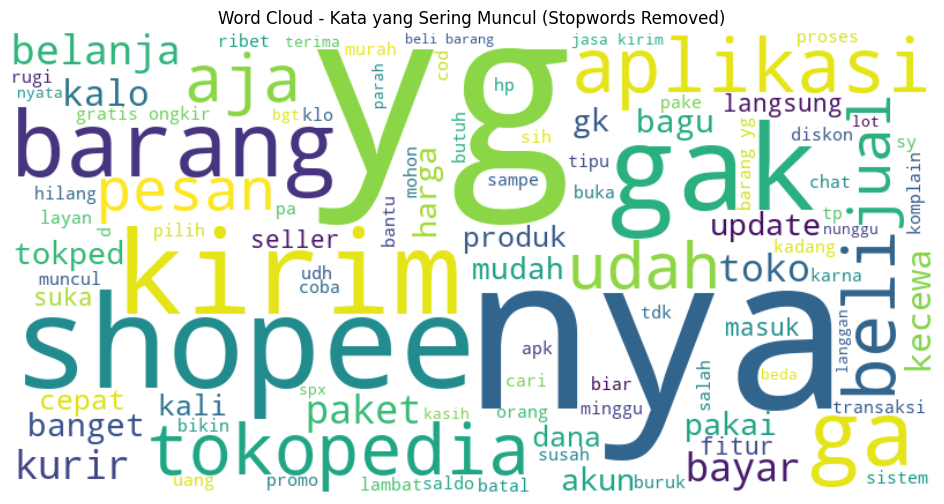

In [ ]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('stopwords')

stop_words = set(stopwords.words('indonesian'))

text = " ".join(review for review in olshop['clean_review'])

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stop_words,
    max_words=100,
    colormap='viridis'
).generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Kata yang Sering Muncul')
plt.show()